In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import MaaSSim

In [3]:
#!pip install MaaSSim
import MaaSSim.utils
import logging
from dotmap import DotMap
import MaaSSim.simulators
from MaaSSim.data_structures import structures as inData
from MaaSSim.acceptance import f_decline, f_decline_R50, f_decline_R75, f_decline_R100, f_decline_mixed, f_mode
from MaaSSim.acceptance import RA_kpi_veh, RA_kpi_pax

In [4]:
import osmnx as ox
import networkx as nx
import random
import pandas as pd
import matplotlib.pyplot as plt          
import numpy as np
import seaborn as sns
import folium
import h3

In [5]:
params = MaaSSim.utils.get_config('glance.json')
params.vehicle_fixed_positions = True
params.times.patience = 165 #in second 600
params.dist_threshold = 20000 #in meter
params.dist_threshold_min = 3000
params.city = "Amsterdam, Netherlands"
params.paths.G = "../../data/graphs/Amsterdam.graphml"
params.paths.skim = "../../data/graphs/Amsterdam.csv"

params.d2d.fuel_cost = 0.5 #euro/km
params.platforms.comm_rate = 0.25
params.platforms.base_fare = 2
params.platforms.fare = 1.2 

params.platforms.min_fare = 5
params.speeds.ride=10
params.times.decline=20
params.assert_me = False

params.paths.requests = 'Amsterdam_requests_new.csv'
params.dynamic_paricing = 'On'
params.zoning_level = 7
params.seed = 1

params.nP = 10000
params.nV = 100
params.start_time = pd.Timestamp('1900-01-01 08:00:00')
params.simTime = 8
params.end_time = params.start_time + pd.Timedelta(int(params.simTime), 'h')
# params.end_time = pd.Timestamp('1900-01-01 16:00:00')


pd.set_option('display.max_rows', 100)

In [6]:

sim = MaaSSim.simulators.simulate(params=params, f_trav_mode=f_mode, f_driver_decline=f_decline, kpi_pax=RA_kpi_pax, kpi_veh=RA_kpi_veh)

KeyboardInterrupt: 

In [11]:
sim.res[0].veh_exp

,ACCEPTANCE_RATE,PROFIT,PROFIT/hour,IDLE_TIME,nREQUESTS,nRIDES,nREJECTS,DRIVING_DIST,AVE_DRIVING_DIST,DRIVING_TIME,AVE_PICKUP_DIST,AVE_TRIP_DIST,REVENUE,REVENUE/hour,COST,IMPOSED_DELAY,AR,SURGE_FEES,AVE_SURGE_MP
veh,,,,,,,,,,,,,,,,,,,
1,79.545455,166.7515,20.843937,340.0,46,35,9.0,267.31,7.637429,26731.0,1.844857,5.792571,300.4065,37.550812,133.655,472,70-80,65.47794,1.302857
2,94.444444,191.0474,23.880925,330.0,44,34,2.0,262.43,7.718529,26243.0,1.633824,6.084706,322.2624,40.282800,131.215,58,90-100,85.13241,1.373529
3,92.307692,184.2493,23.031162,379.0,44,36,3.0,267.43,7.428611,26743.0,1.812222,5.616389,317.9643,39.745537,133.715,188,90-100,82.05432,1.352778
4,92.307692,189.8883,23.736038,350.0,45,36,3.0,268.26,7.451667,26826.0,1.773333,5.678333,324.0183,40.502288,134.130,328,90-100,86.09655,1.380556
5,84.444444,164.3081,20.538512,370.0,53,38,7.0,257.84,6.785263,25784.0,1.685526,5.099737,293.2281,36.653512,128.920,475,80-90,61.85463,1.247368
6,88.095238,200.0810,25.010125,360.0,49,37,5.0,259.55,7.014865,25955.0,1.634865,5.380000,329.8560,41.232000,129.775,410,80-90,95.25519,1.429730
7,83.333333,177.7707,22.221337,424.0,43,35,7.0,260.79,7.451143,26079.0,1.721714,5.729429,308.1657,38.520712,130.395,423,80-90,75.24351,1.317143
8,78.571429,157.1696,19.646200,410.0,44,33,9.0,263.18,7.975152,26318.0,2.085758,5.889394,288.7596,36.094950,131.590,566,70-80,64.38438,1.318182
9,92.105263,193.3026,24.162825,340.0,42,35,3.0,265.38,7.582286,26538.0,1.636571,5.945714,325.9926,40.749075,132.690,163,90-100,86.24913,1.362857


In [62]:
# make max_ds_dfl7.csv' with 5 replications
sims = [sim100_1, sim100_2, sim100_3, sim100_4]
# sims = [sim200_1, sim200_2, sim200_3, sim200_4, sim200_5]

df = pd.DataFrame(index=sims[0].concat_sdf.groupby(['hex_address']).max().index)

for i in range(1,len(sims)+1):
    df['sim{}'.format(i)] = sims[i-1].concat_sdf.groupby(['hex_address']).max()['D/S']
    
df['ave_max'] = df.mean(axis=1)
print(df.ave_max.mean())
df.to_csv('max_ds_100.csv')
# df.to_csv('max_ds_dfl7.csv')
df

6.663636363636364


,sim1,sim2,sim3,sim4,ave_max
hex_address,,,,,
871968240ffffff,2.0,0.0,1.0,1.0,1.00
871968241ffffff,2.0,3.0,3.0,3.0,2.75
871968244ffffff,2.0,4.0,2.0,1.0,2.25
871968245ffffff,1.0,1.0,1.0,2.0,1.25
871968248ffffff,2.0,2.0,3.0,3.0,2.50
871968249ffffff,6.0,5.0,5.0,7.0,5.75
87196824cffffff,3.0,4.0,3.0,4.0,3.50
87196824dffffff,7.0,7.0,9.0,11.0,8.50
871968263ffffff,0.0,0.0,0.0,0.0,0.00


In [15]:
simlist = [sim100, sim200, sim300, sim400, sim500]
nv = [100,200,300,400,500]

df = pd.DataFrame(columns=['simulation','surge_1', 'surge_1_2', 'surge_2_3', 'surge_3_4',
                           'surge_4_5'])


for sim in simlist:
    
    l1 = []; l2=[]; l3=[]; l4=[]; l5=[]
    for v in range(1, nv[simlist.index(sim)]+1):
        for s in sim.vehs[v].surge_mps.values():
            if s<=1:
                l1.append(s)
            elif s<=2:
                l2.append(s)
            elif s<=3:
                l3.append(s)
            elif s<=4:
                l4.append(s)
            elif s<=5:
                l5.append(s)

    t = len(l1) + len(l2)+ len(l3)+ len(l4)+ len(l5)
    new_row = {'surge_1':100*len(l1)/t, 'surge_1_2':100*len(l2)/t, 
               'surge_2_3':100*len(l3)/t, 'surge_3_4':100*len(l4)/t,
               'surge_4_5':100*len(l5)/t}
    df = df.append(new_row, ignore_index=True)
    
    # print('mp = 1 : ', 100*len(l1)/t, '%'); print('mp = 2 : ', 100*len(l2)/t, '%')
    # print('mp = 3 : ', 100*len(l3)/t, '%'); print('mp = 4 : ', 100*len(l4)/t, '%')
    # print('mp = 5 : ', 100*len(l5)/t, '%')
df.simulation = [100,200,300,400,500]
df

,simulation,surge_1,surge_1_2,surge_2_3,surge_3_4,surge_4_5
0,100,29.286761,59.330728,10.210064,0.879336,0.293112
1,200,48.156551,44.809983,6.097561,0.779921,0.155984
2,300,74.411927,20.607399,4.307013,0.519050,0.154611
3,400,90.554079,7.053772,2.095686,0.245349,0.051114
4,500,99.316514,0.402050,0.211076,0.010051,0.060308


In [16]:
df.set_index('simulation', inplace=True)

In [19]:
df

,surge_1,surge_1_2,surge_2_3,surge_3_4,surge_4_5
simulation,,,,,
100,29.286761,59.330728,10.210064,0.879336,0.293112
200,48.156551,44.809983,6.097561,0.779921,0.155984
300,74.411927,20.607399,4.307013,0.519050,0.154611
400,90.554079,7.053772,2.095686,0.245349,0.051114
500,99.316514,0.402050,0.211076,0.010051,0.060308


In [140]:
sim300.concat_sdf.groupby(['hex_address']).max()

,cnt,demand,supply,D/S
hex_address,,,,
871968240ffffff,11,1,2,1.0
871968241ffffff,12,2,4,2.0
871968244ffffff,12,2,2,2.0
871968245ffffff,30,1,0,1.0
871968248ffffff,34,1,2,1.0
871968249ffffff,250,5,4,5.0
87196824cffffff,47,3,3,3.0
87196824dffffff,346,7,12,7.0
871968263ffffff,1,0,0,0.0


In [126]:
df = pd.read_csv('max_ds_dfl7.csv')
df

,hex_address,sim1,sim2,sim3,sim4,sim5,ave_max
0,871968240ffffff,2.0,0.0,1.0,1.0,0.0,0.8
1,871968241ffffff,2.0,3.0,3.0,3.0,3.0,2.8
2,871968244ffffff,2.0,4.0,2.0,1.0,2.0,2.2
3,871968245ffffff,1.0,1.0,1.0,2.0,1.0,1.2
4,871968248ffffff,2.0,2.0,3.0,3.0,1.0,2.2
5,871968249ffffff,6.0,4.0,4.0,7.0,5.0,5.2
6,87196824cffffff,3.0,4.0,3.0,4.0,3.0,3.4
7,87196824dffffff,7.0,7.0,9.0,8.0,7.0,7.6
8,871968263ffffff,0.0,0.0,0.0,0.0,0.0,0.0
9,871968268ffffff,4.0,2.0,3.0,3.0,2.0,2.8


In [55]:
0.02/1.14

0.01754385964912281

In [54]:
l = []
for v in range(1,300+1):
    l = l + list(sim300.vehs[v].surge_mps.values())  
sum(l) / len(l)

1.1629155162893368

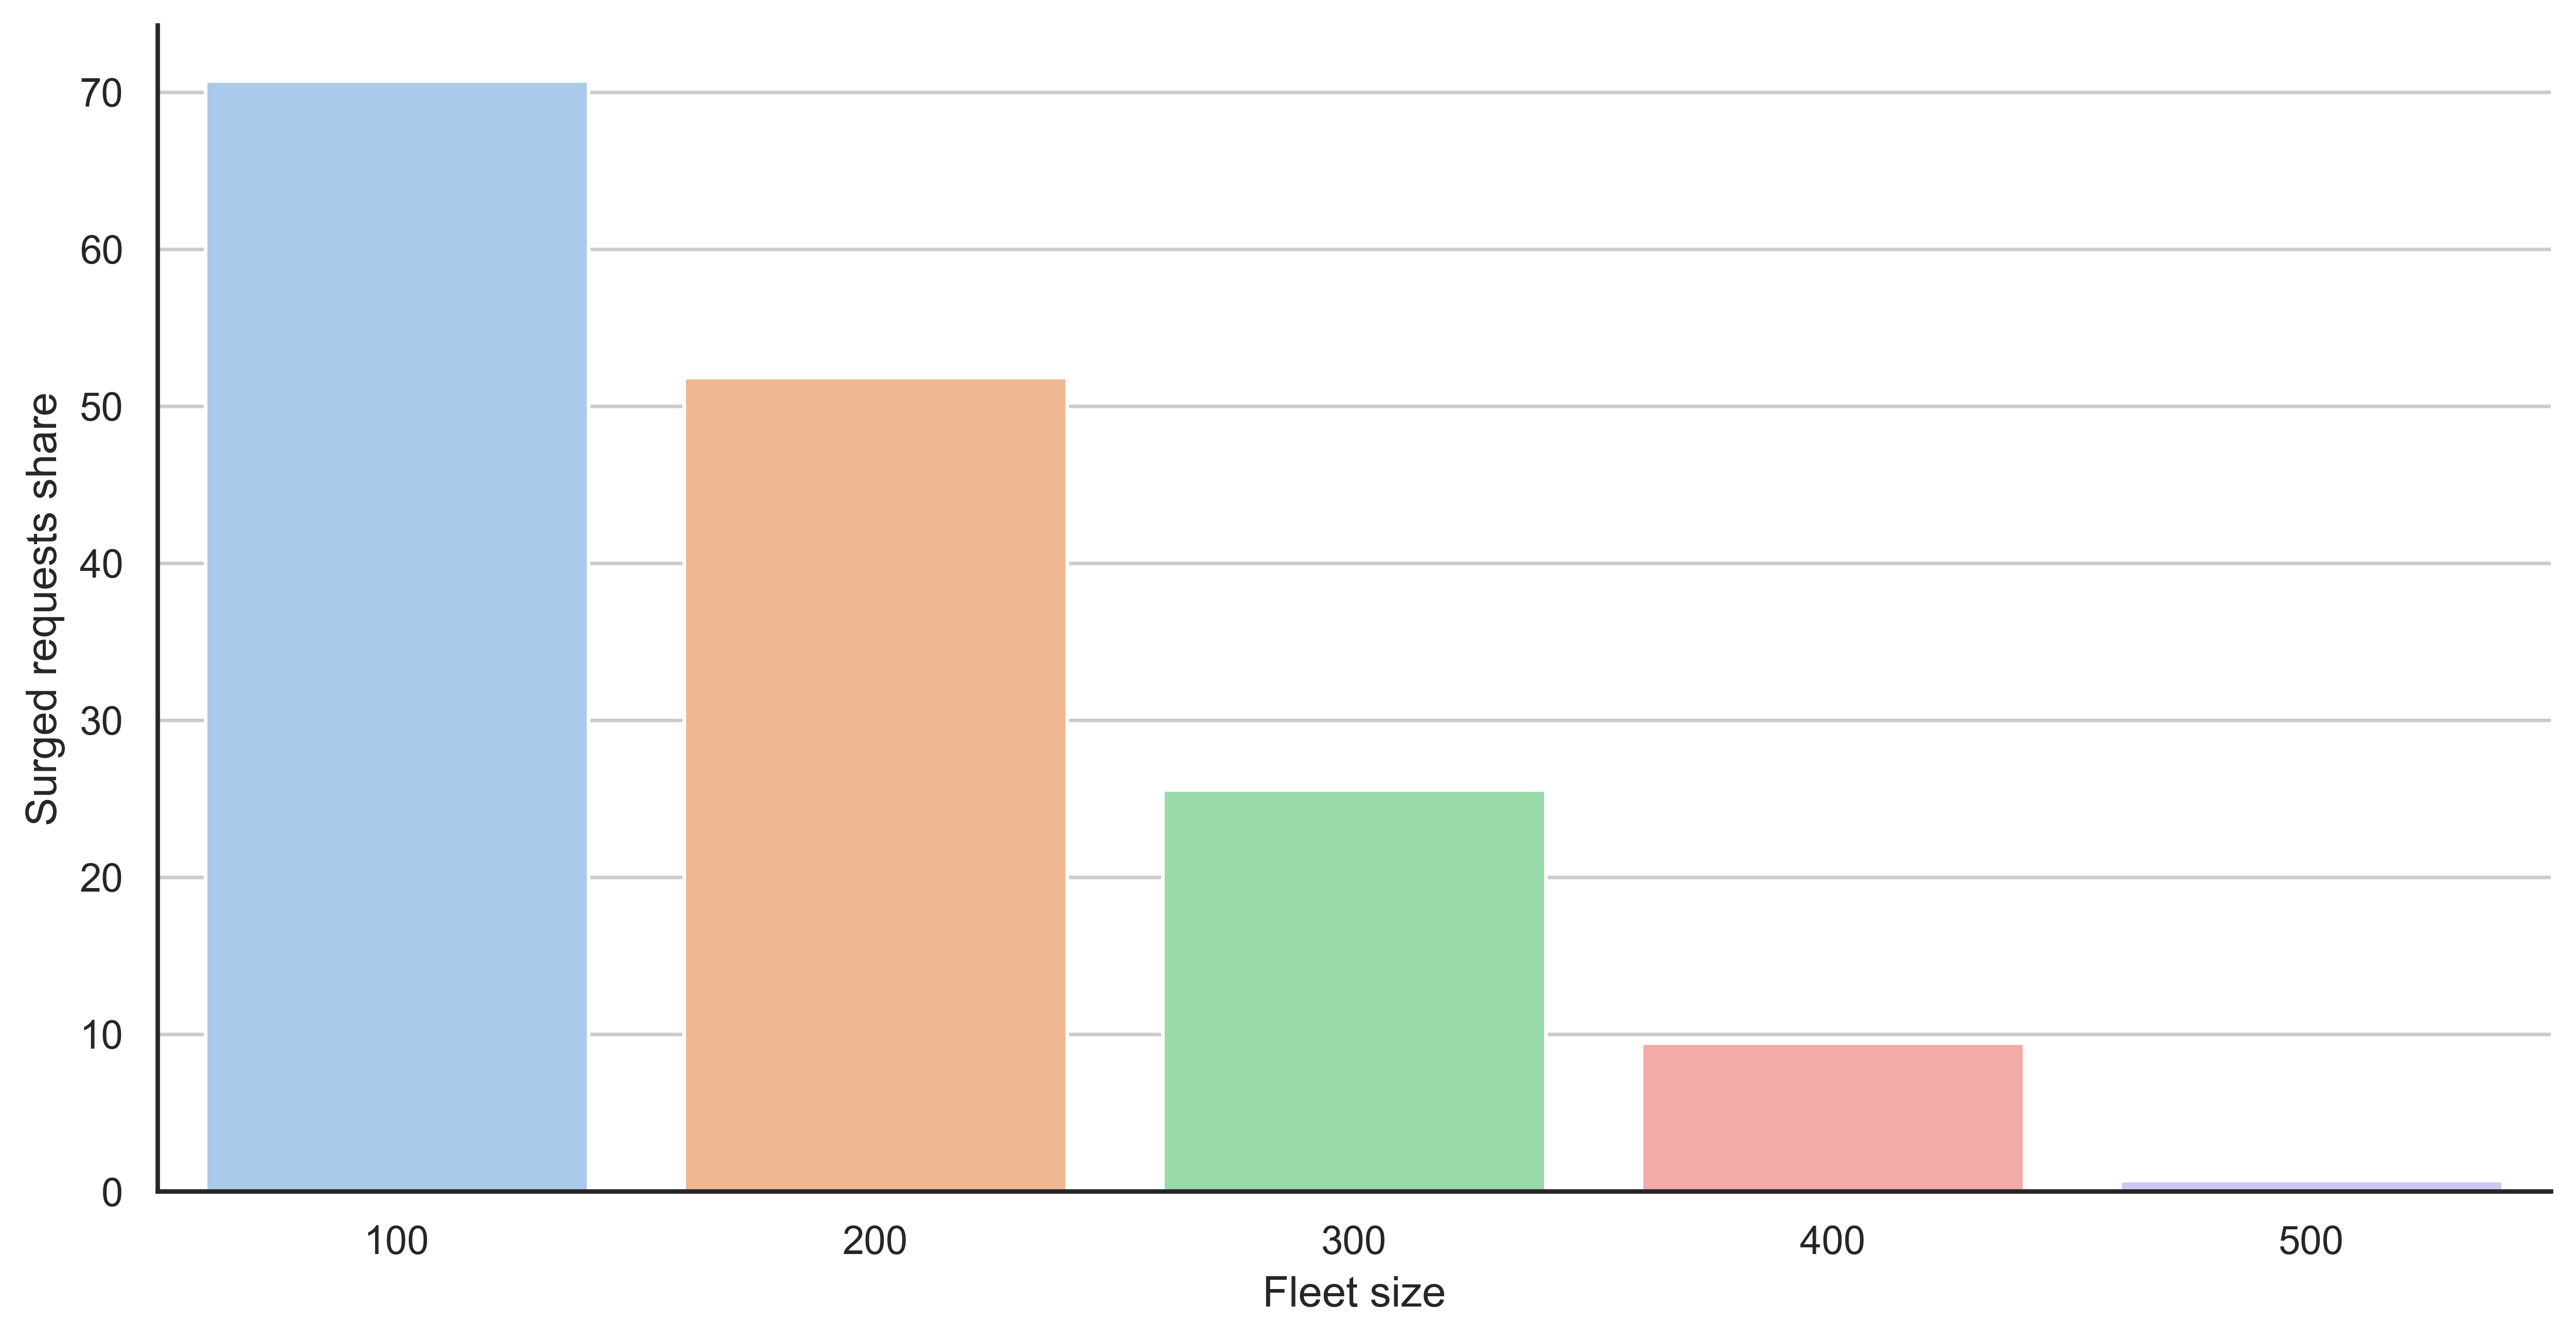

In [82]:
sns.set(font_scale = 1.5)
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set_style('white')
fig, ax = plt.subplots(figsize=(12,6))
sns.set_palette('pastel')
sns.despine()

x = [100,200,300,400,500]
y = []
for i in x:
    y.append(100-df.surge_1.loc[i])
ax = sns.barplot(x=x, y=y)
ax.set(xlabel='Fleet size', ylabel='Surged requests share')
ax.grid(axis='y')

# plt.tight_layout()
plt.savefig('Surge_barplot.png')

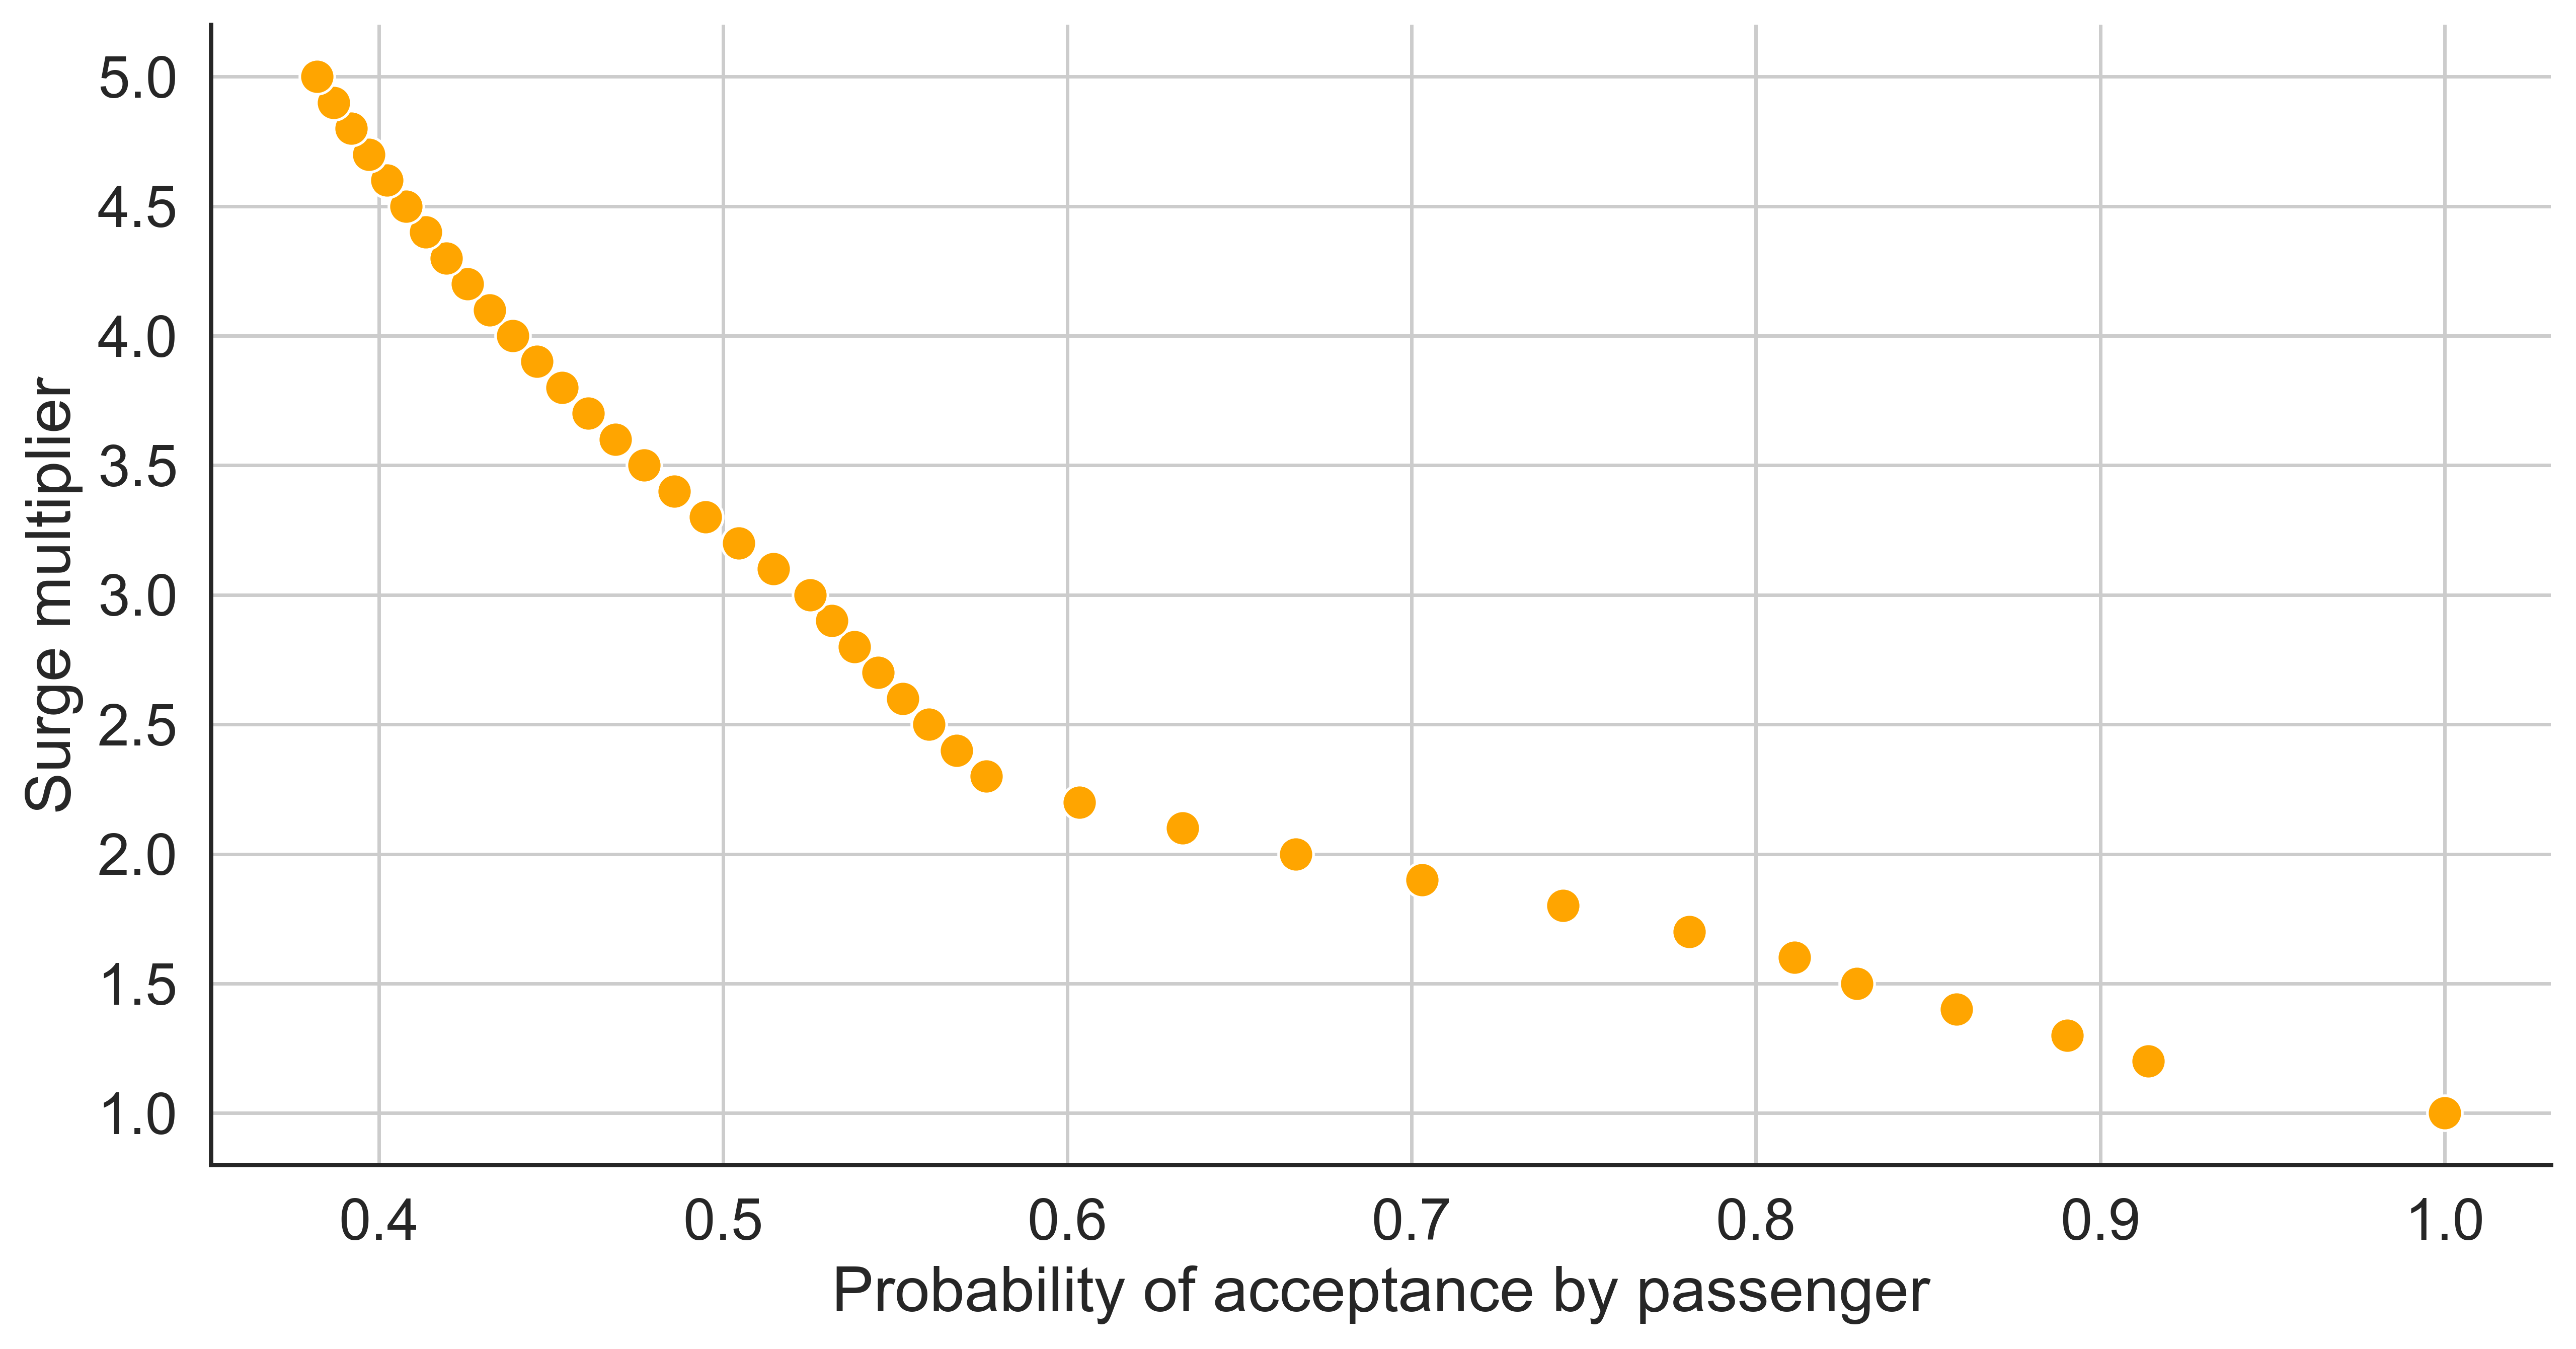

In [104]:
sns.set(font_scale = 1.5)
sns.set_style('white')
sns.set_palette('Set2')
# sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
fig, ax = plt.subplots(figsize=(12,6))
sns.despine()

RD = [-0.43, -0.31, -0.47, -0.47, -0.33, -0.60, -0.80, -0.99, -0.99, -0.99, -0.99, -0.99, -0.34
      , -0.34, -0.34, -0.34, -0.34, -0.34, -0.34, -0.61, -0.61, -0.61, -0.61, -0.61, -0.61, -0.61,
      -0.61, -0.61, -0.61, -0.61, -0.61, -0.61, -0.61, -0.61, -0.61, -0.61, -0.61, -0.61, -0.61]
SMP = list(np.arange(1.20, 5.1, 0.1000))
SMP = [round(item, 1) for item in SMP]

pr = [1]
smp = [1]

for i in range(0,len(RD)):
    dp = (SMP[i]-smp[-1])/smp[-1]
    dd = dp*(RD[i])
    pr.append((1+dd)*pr[-1])
    smp.append(SMP[i])
    
surge_dict = {}
for i in range(0, len(smp)):
    surge_dict[smp[i]] = pr[i]
surge_dict[1.1] = (surge_dict[1] + surge_dict[1.2])/2

ax = sns.scatterplot(x=pr, y=smp, color='orange', s=100)

ax.set(xlabel='Probability of acceptance by passenger', ylabel='Surge multiplier')
ax.grid(axis='y')
ax.grid(axis='x')


# plt.tight_layout()
plt.savefig('demand_elasticity.png')

In [25]:
x[x.index(100)]

100

In [27]:
df.surge_1.loc[100]

29.28676111382511

In [71]:
sim300_ns.platforms

,fare,name,batch_time,base_fare,min_fare,profit
1,1.2,NaN,NaN,2,5,19362.798


In [72]:
sim300.platforms

,fare,name,batch_time,base_fare,min_fare,profit
1,1.2,NaN,NaN,2,5,21238.8252


In [66]:
d = sim300.res[0].pax_exp
d.loc[(d.OFFER_REJECTED_BY_PAX !=True) & (d.LOST_PATIENCE !=True)].SURGE_MP.mean()

1.117498251340625

In [61]:
1422/10000

0.1422

In [73]:
a = 19362.798
b = 21238.8252
(b-a)/a

0.09688822865373076

In [104]:
def visualize_hexagons(hexagons, color="red", w=1, folium_map=None):
    """
    hexagons is a list of hexcluster. Each hexcluster is a list of hexagons. 
    eg. [[hex1, hex2], [hex3, hex4]]
    """
    polylines = []
    lat = []
    lng = []
    for hex in hexagons:
        polygons = h3.h3_set_to_multi_polygon([hex], geo_json=False)
        # flatten polygons into loops.
        outlines = [loop for polygon in polygons for loop in polygon]
        polyline = [outline + [outline[0]] for outline in outlines][0]
        lat.extend(map(lambda v:v[0],polyline))
        lng.extend(map(lambda v:v[1],polyline))
        polylines.append(polyline)
    
    if folium_map is None:
        m = folium.Map(location=[sum(lat)/len(lat), sum(lng)/len(lng)], zoom_start=13, tiles='cartodbpositron')
    else:
        m = folium_map
    for polyline in polylines:
        my_PolyLine=folium.PolyLine(locations=polyline,weight=w,color=color,fill= True)
        m.add_child(my_PolyLine)
    return m
    

def visualize_polygon(polyline, color):
    polyline.append(polyline[0])
    lat = [p[0] for p in polyline]
    lng = [p[1] for p in polyline]
    m = folium.Map(location=[sum(lat)/len(lat), sum(lng)/len(lng)], zoom_start=13, tiles='cartodbpositron')
    my_PolyLine=folium.PolyLine(locations=polyline,weight=8,color=color)
    m.add_child(my_PolyLine)
    return m

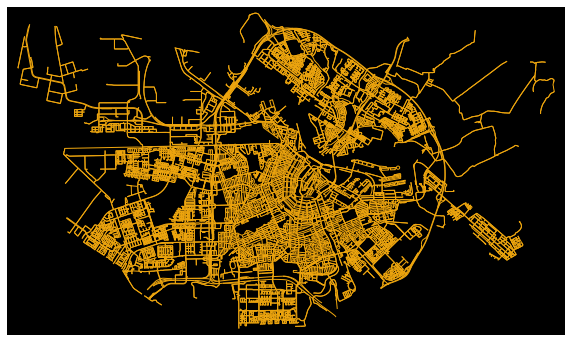

In [105]:
G = sim300.inData.G
fig, ax = ox.plot_graph(G, figsize=(10, 10), show=False, close=False, node_size=0, bgcolor='black', 
                        edge_color=(0.933, 0.65, 0.059))

In [41]:
# Visualiziation of hexagons on Amsterdam map
lat = []
lng = []
for i in G.nodes:
    lat.append(G.nodes[i]['y'])
    lng.append(G.nodes[i]['x'])
    
df = pd.DataFrame()
df['lat'] = lat
df['lng'] = lng

level = 7
hex_col = 'hex'+str(level)
df[hex_col] = df.apply(lambda x: h3.geo_to_h3(x.lat,x.lng,level),axis=1)
df = df.groupby(hex_col).size().to_frame('cnt').reset_index()

l = list(df[hex_col])
m = visualize_hexagons(l)
display(m)

In [108]:
hex_address = ['871969526ffffff', '871969c9bffffff', '871969c8bffffff']
# hex_address = f.loc[f.bucket=='acc_above5'].zone.unique()
# hex_address = ['871969c9bffffff', '871969535ffffff', '871969534ffffff', '871969526ffffff', '871969522ffffff']
m = visualize_hexagons(hex_address)
display(m)

In [107]:
ds_dict = {100:'max_ds_100.csv', 200:'max_ds_200.csv', 300:'max_ds_300.csv',
                   400:'max_ds_400.csv', 500:'max_ds_500.csv', , 600:'max_ds_500.csv',
          , 500:'max_ds_500.csv'}

ds_dict

{100: 'max_ds_100.csv',
 200: 'max_ds_200.csv',
 300: 'max_ds_300.csv',
 400: 'max_ds_400.csv',
 (500, 600): 'max_ds_500.csv'}

In [111]:
54/12

4.5